# Problem Statement : Wine Quality Analysis Using Machine Learning

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from warnings import filterwarnings
filterwarnings(action = 'ignore')

## Step 2: Load the dataset

In [39]:
# load the dataset into pandas dataframe
df = pd.read_csv('winequality-red.csv')
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1015,10.5,0.390,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.40,6
278,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
453,10.4,0.330,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.20,7
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
1273,7.5,0.580,0.20,2.0,0.073,34.0,44.0,0.99494,3.10,0.43,9.30,5
1042,8.9,0.500,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.10,6
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.90,4
317,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.40,6
695,5.1,0.470,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.80,6
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7


In [3]:
df.shape 

(1599, 12)

In [4]:
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check for missing values in a dataset

In [8]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There is no missing value in our dataset 

## Data Analysis and Visualization

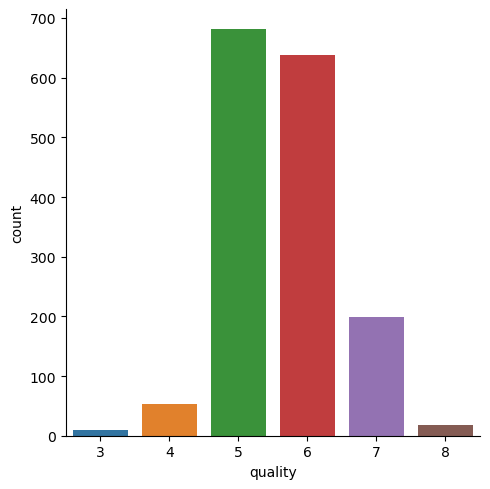

In [9]:
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

from above graph we can analyse that 3,4,5,6 having low quality wine and 7,8 are high quality wines.

# Histogram

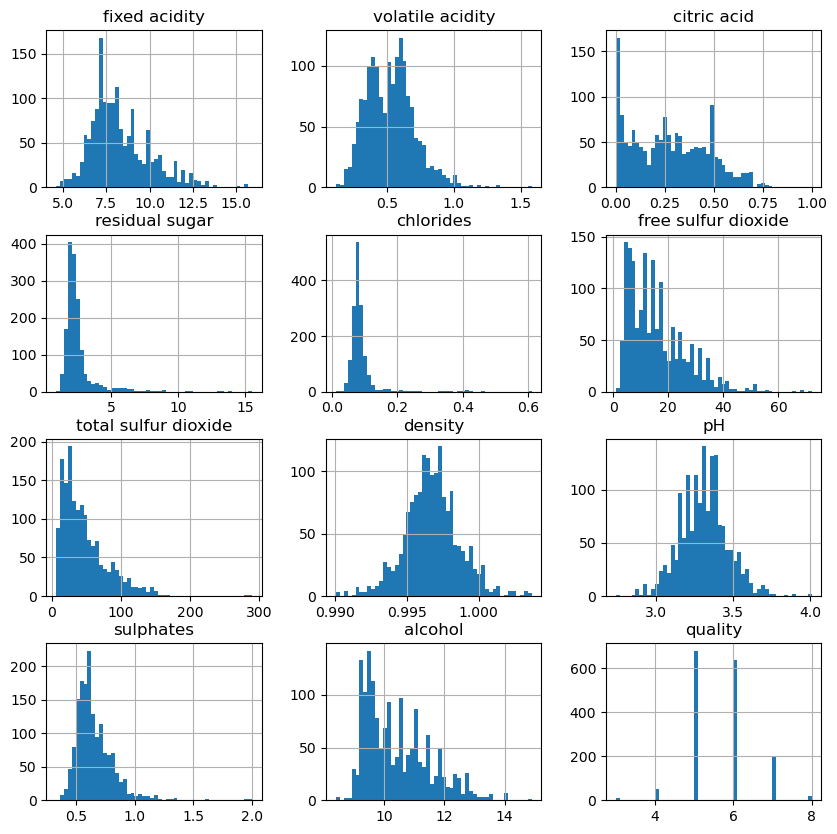

In [10]:
df.hist(figsize=(10,10),bins=50) #no. of records available for each column or frequency of data or distribution of variables.
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

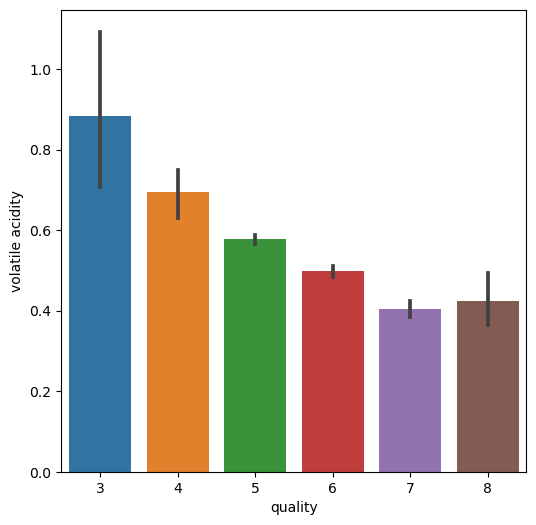

In [11]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

from above graph we can analyze that volatile acidity and quality are inversely proportional bcz high quality wine then volatitle acidity is low and vice versa.

<Axes: xlabel='quality', ylabel='citric acid'>

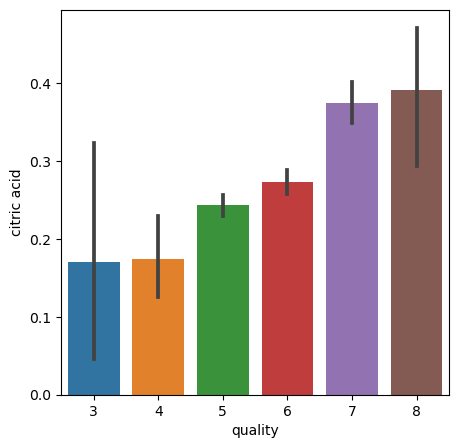

In [12]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

from above graph we can analyze that citric acid  and quality are  proportional to each other
bcz high quality wine then citric acid  is high.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

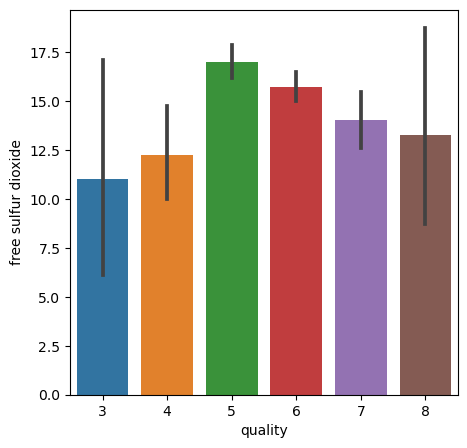

In [13]:
# free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = df)

In [14]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Positive Correlation & Negative Correlation

In [15]:
correlation = df.corr()

<Axes: >

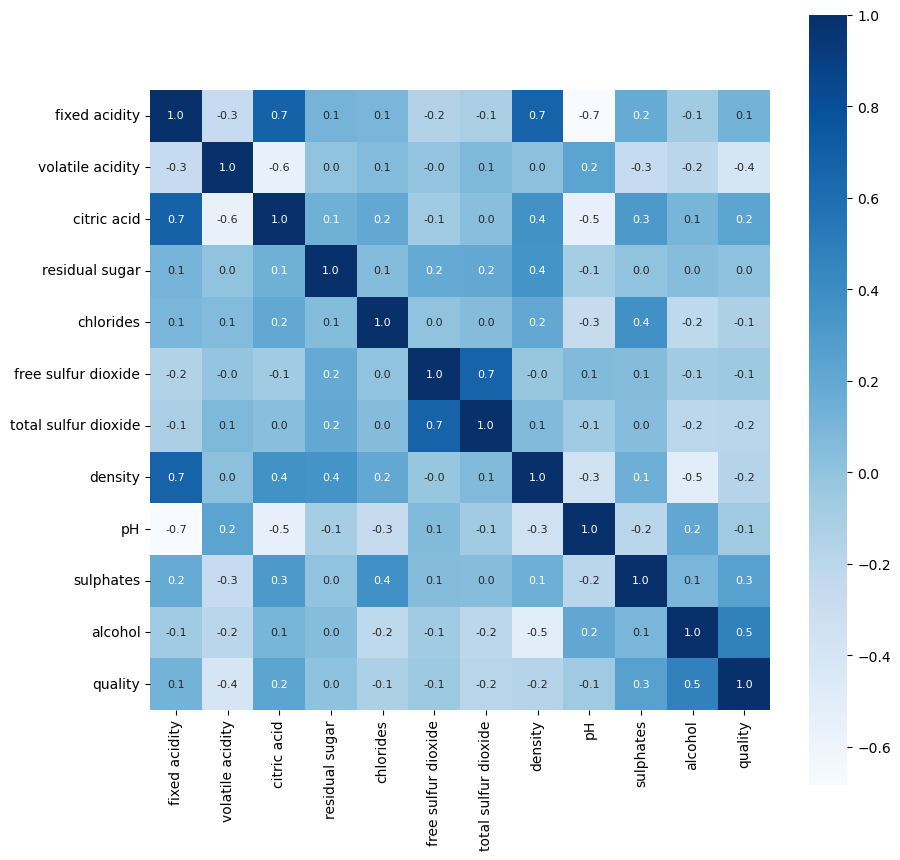

In [16]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
# +ve correlation means if one value increases then other also increases(dark color => +ve correlation)
# -ve correlation means if one value decreases then other also decreases(light color => -ve correlation)

##  Data Preprocessing

In [17]:
# separate the data and Label
X = df.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#### Label Binarization

In [18]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [19]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## feature Importance

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07768388 0.09906187 0.09768176 0.07772371 0.07034342 0.07164862
 0.07940487 0.08526006 0.06644877 0.10958413 0.16515891]


## Train Test Splitting

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [22]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [23]:
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', Y_test.shape)

Shape of X_train =  (1279, 11)
Shape of y_train =  (1279,)
Shape of X_test =  (320, 11)
Shape of y_test =  (320,)


## Model Training:

## 1) KNN

In [24]:
model_res = pd.DataFrame(columns=['Model','Score'])

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)]=['KNeighborsClassifier',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,KNeighborsClassifier,0.871875


## 2) Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print('Accuracy Score:',accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)]=['DecisionTreeClassifier',accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.896875


,Model,Score
0,KNeighborsClassifier,0.871875
1,DecisionTreeClassifier,0.896875


# 3) Random forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(random_state=1)
model6.fit(X_train,Y_train)
y_pred = model6.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)]=['RandomForestClassifier',accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.921875


,Model,Score
0,KNeighborsClassifier,0.871875
1,DecisionTreeClassifier,0.896875
2,RandomForestClassifier,0.921875


In [28]:
model_res = model_res.sort_values(by='Score',ascending=False)
model_res

,Model,Score
2,RandomForestClassifier,0.921875
1,DecisionTreeClassifier,0.896875
0,KNeighborsClassifier,0.871875


In [44]:
print(model6.predict([[12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80]]))

[1]


In [45]:
import pickle

In [46]:
with open('classifier.pkl','wb') as file:
    pickle.dump(model6,file)

### K-fold using random forest 

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, Y_train, Y_test are already defined
# If not, you need to split your data into training and testing sets

# Initialize the Random Forest classifier
model6 = RandomForestClassifier(random_state=1)

# Perform k-fold cross-validation with k=5
scores = cross_val_score(model6, X_train, Y_train, cv=6)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate and print the mean accuracy
print("Mean accuracy:", scores.mean())

# Fit the model on the entire training data
model6.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model6.predict(X_test)

# Calculate and print the accuracy score on the test set
print('Accuracy Score on test set:', accuracy_score(Y_test, y_pred))

# Assuming model_res is a DataFrame to store the results
# If not, you need to initialize it
model_res = pd.DataFrame(columns=['Model', 'Accuracy'])

# Append the results to model_res
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(Y_test, y_pred)]

# Display the model_res DataFrame
print(model_res)
